In [1]:
%matplotlib inline
# All imports

from random import choice
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

np.set_printoptions(formatter={'float': '{:.5f}'.format})
print(sklearn.__version__)
from scipy import stats
from sklearn import datasets
import matplotlib.image as mpimg
import time
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from astropy.io import fits
from astropy.utils.data import download_file

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.19.1


In [2]:
imgs = 20
dir_path = '//Volumes/CJSTORFER/'
cat = Table.read(dir_path+'GroundBasedTraining/classifications.csv')
cat= cat[0:imgs]

ims = np.zeros((imgs, 4, 101, 101))
counter = 0


for i, id in enumerate(cat['ID']):
    if (i%10 == 0):
        counter +=1
        print (str(counter)+"0 done.")
    for j, b in enumerate(['R', 'I', 'G', 'U']):
        ims[i, j] = fits.getdata(dir_path+'GroundBasedTraining/Public/Band'+str(j+1)+'/imageSDSS_'+b+'-'+str(id)+'.fits')

10 done.
20 done.


In [3]:
X = ims
y = np.asarray(cat['is_lens'])

In [4]:
X.shape
im = X[0].T
im.shape
y.shape

(20,)

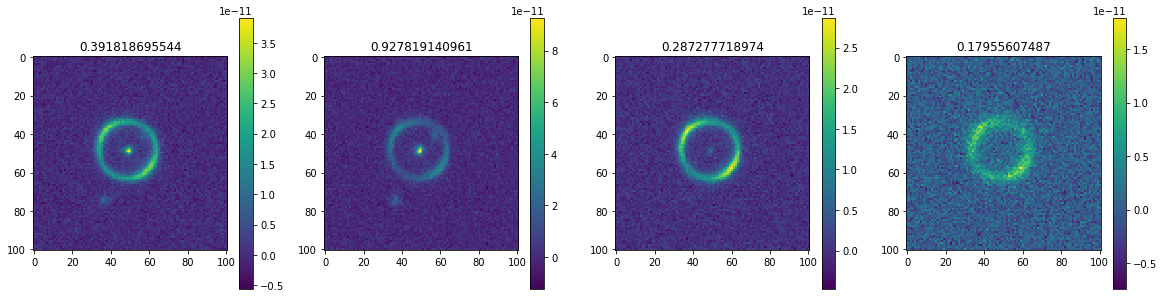

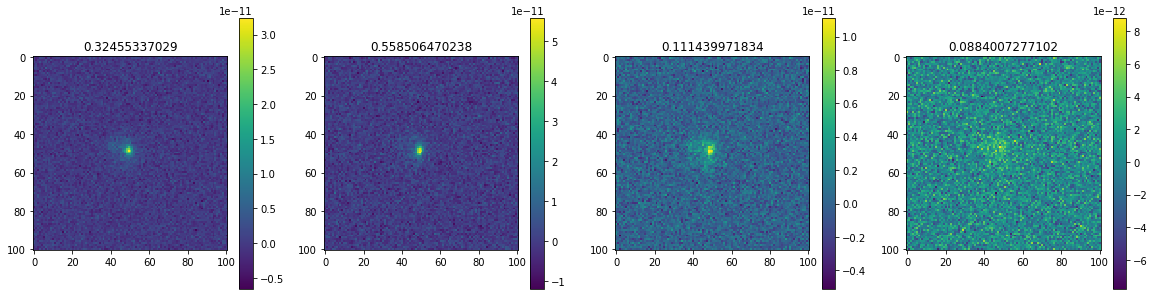

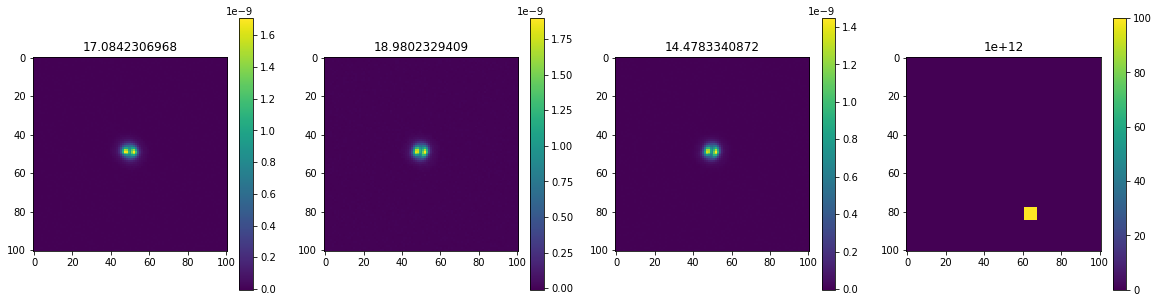

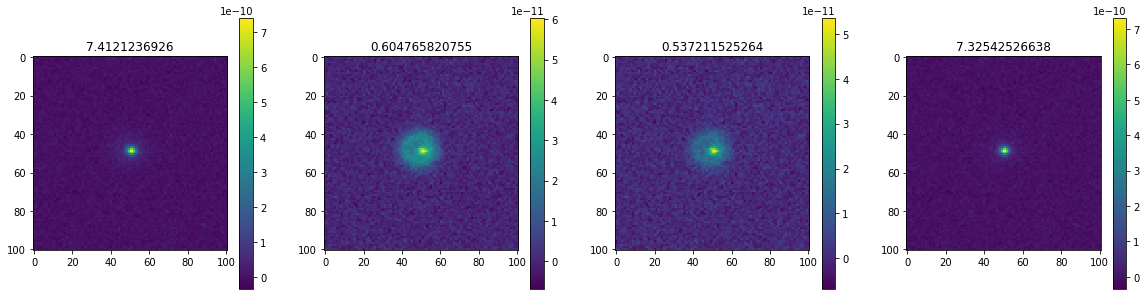

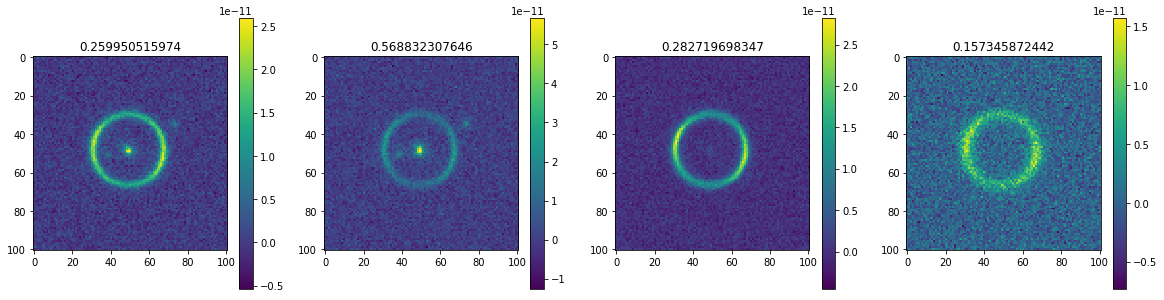

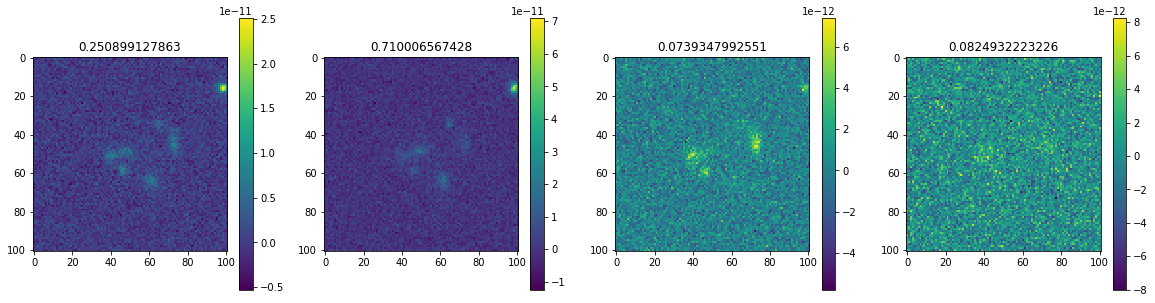

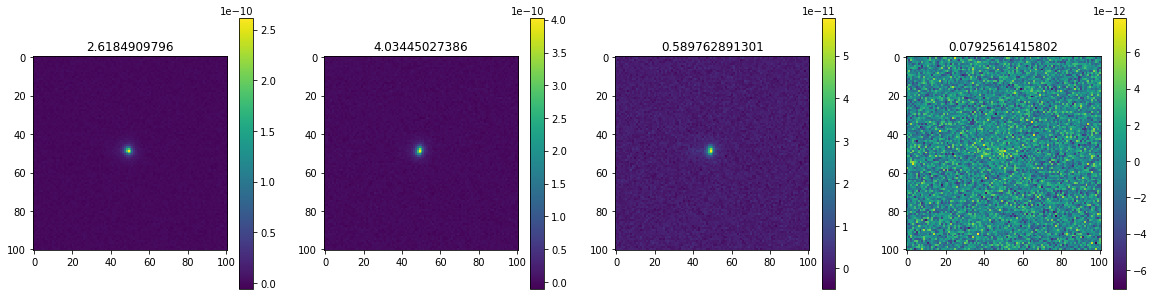

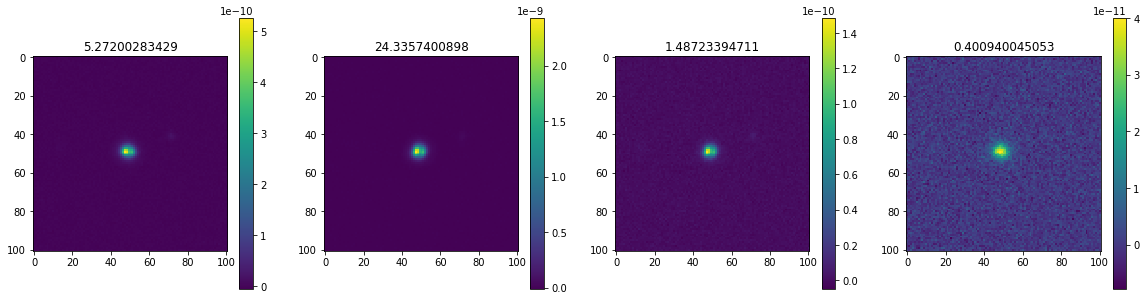

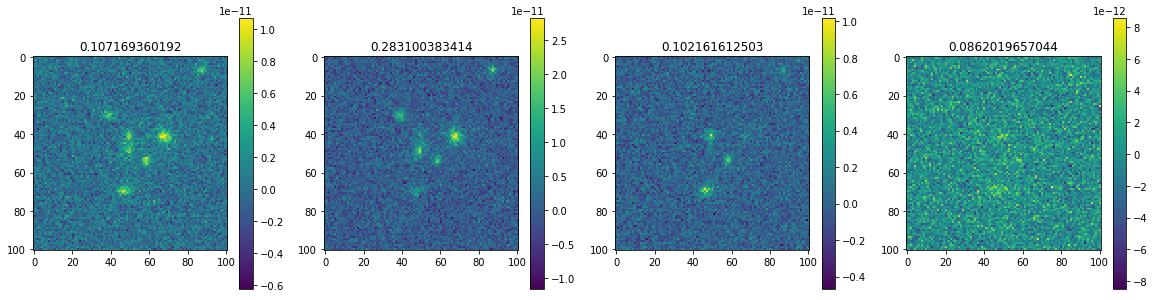

In [5]:
idx = y == 1
X_lens = X[idx]

for i in range(X_lens.shape[0]):
    im = X_lens[i].T
    fig = plt.figure(figsize = (20,5))

    plt.subplot(141)
    plt.imshow(im[:,:,0]); plt.colorbar(); plt.title(im[:,:,0].max()*1e10)
    plt.subplot(142)
    plt.imshow(im[:,:,1]); plt.colorbar(); plt.title(im[:,:,1].max()*1e10)
    plt.subplot(143) 
    plt.imshow(im[:,:,2]); plt.colorbar(); plt.title(im[:,:,2].max()*1e10)
    plt.subplot(144)
    plt.imshow(im[:,:,3]); plt.colorbar(); plt.title(im[:,:,3].max()*1e10)
    plt.show()

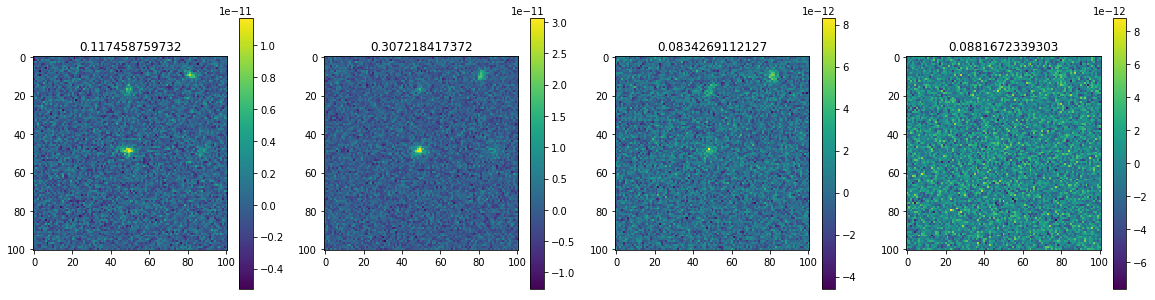

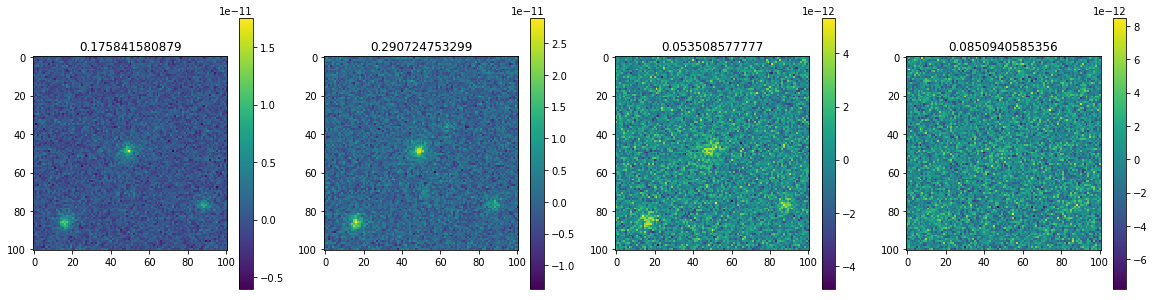

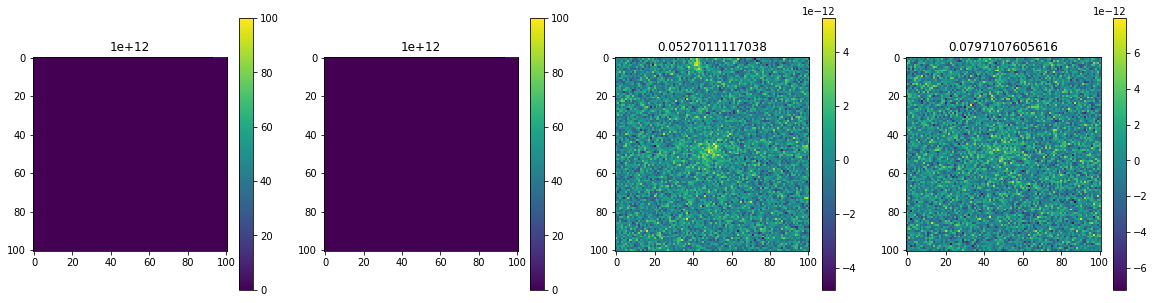

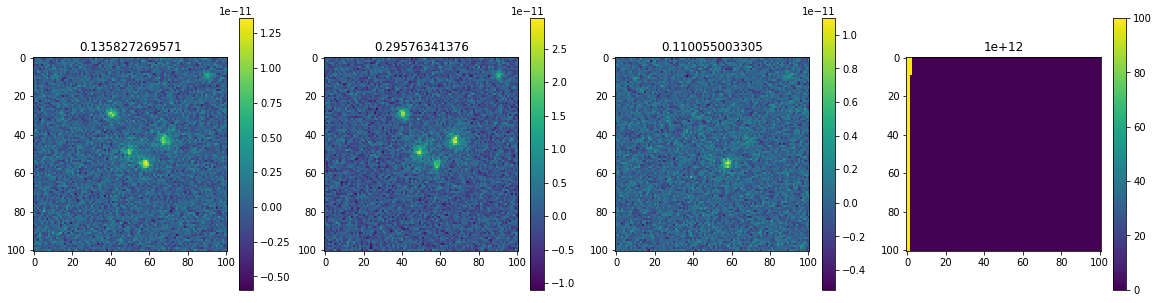

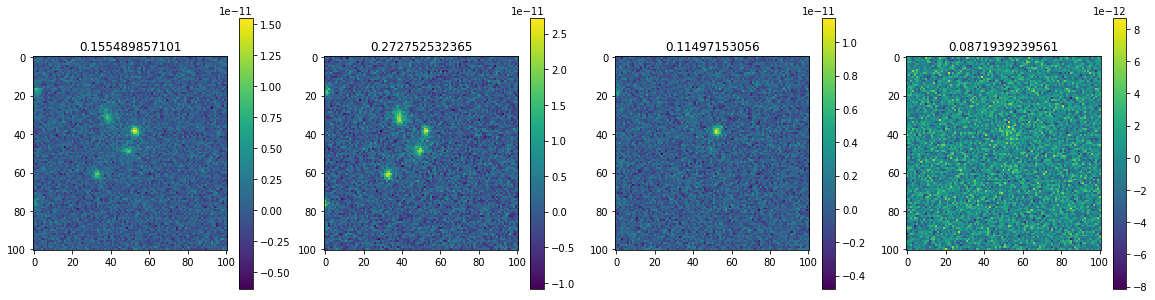

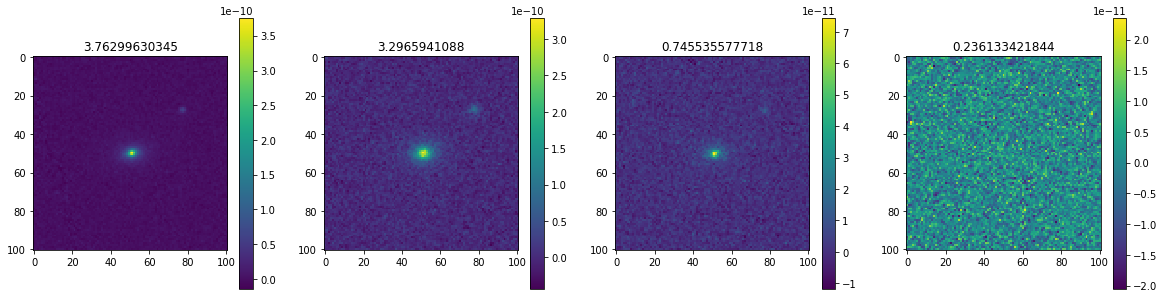

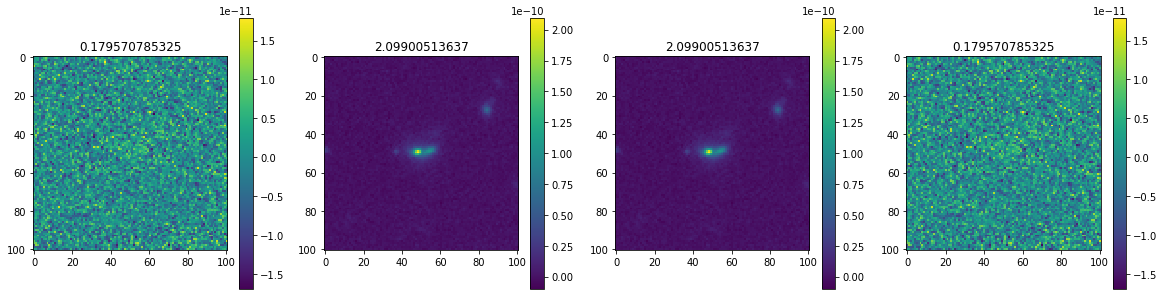

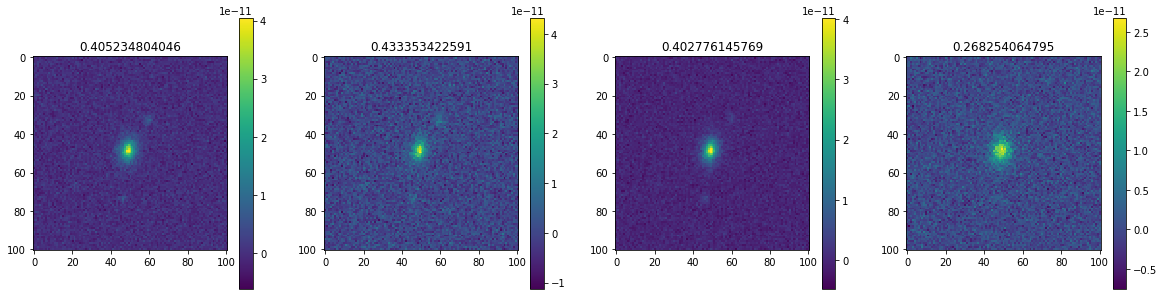

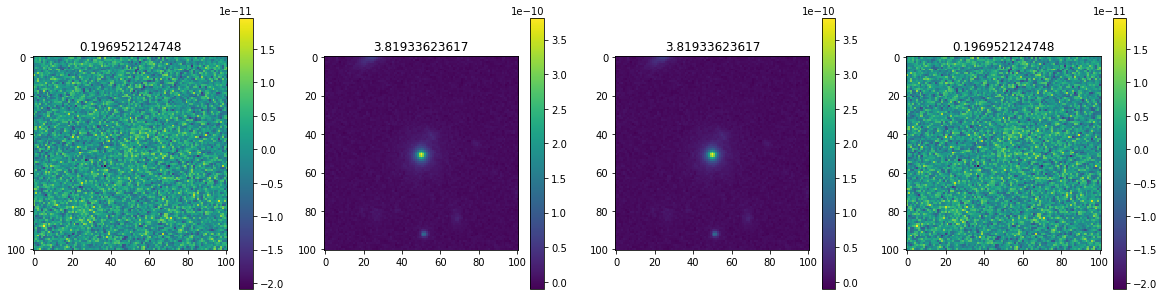

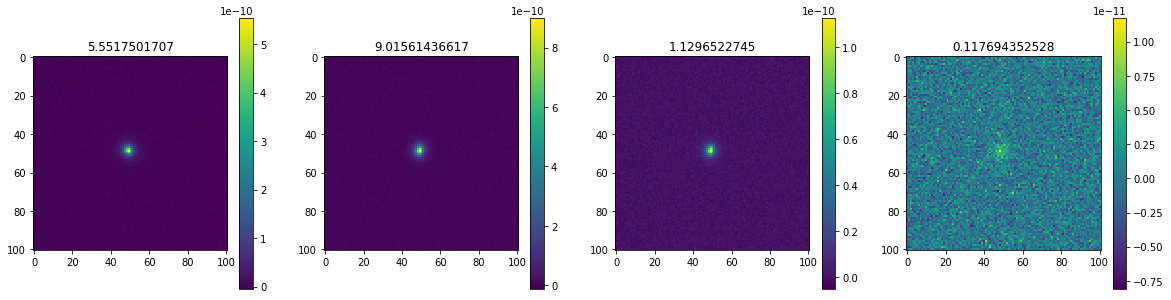

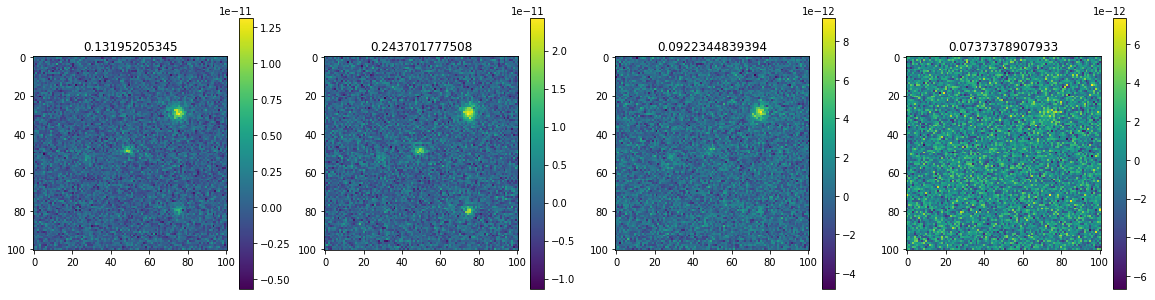

In [8]:
idx = y == 0
X_nonlens = X[idx]

for i in range(X_nonlens.shape[0]):
    im = X_nonlens[i].T
    fig = plt.figure(figsize = (20,5))

    plt.subplot(141)
    plt.imshow(im[:,:,0]); plt.colorbar(); plt.title(im[:,:,0].max()*1e10)
    plt.subplot(142)
    plt.imshow(im[:,:,1]); plt.colorbar(); plt.title(im[:,:,1].max()*1e10)
    plt.subplot(143) 
    plt.imshow(im[:,:,2]); plt.colorbar(); plt.title(im[:,:,2].max()*1e10)
    plt.subplot(144)
    plt.imshow(im[:,:,3]); plt.colorbar(); plt.title(im[:,:,3].max()*1e10)
    plt.show()

In [15]:
import matplotlib.patches as mpatches

In [10]:
dir_path = "/Users/Chris/Downloads/"
kids_x_data = dict()
kids_y_data = dict()
kids_bands = ['u','g','r','i']
for i,band in enumerate(kids_bands):
    data = np.loadtxt(dir_path+"sloan_"+band+"_prime.npy")
    kids_y_data[i] = data[:,1]
    kids_x_data[i] = data[:,0]*10


In [11]:
decals_x_data = dict()
decals_y_data = dict()
decals_bands = ['g','r','z']
for i,band in enumerate(decals_bands):
    data = np.loadtxt(dir_path+"Dataset_"+band+".npy", dtype = float)
    decals_y_data[i] = data[:,1]
    decals_x_data[i] = data[:,0]


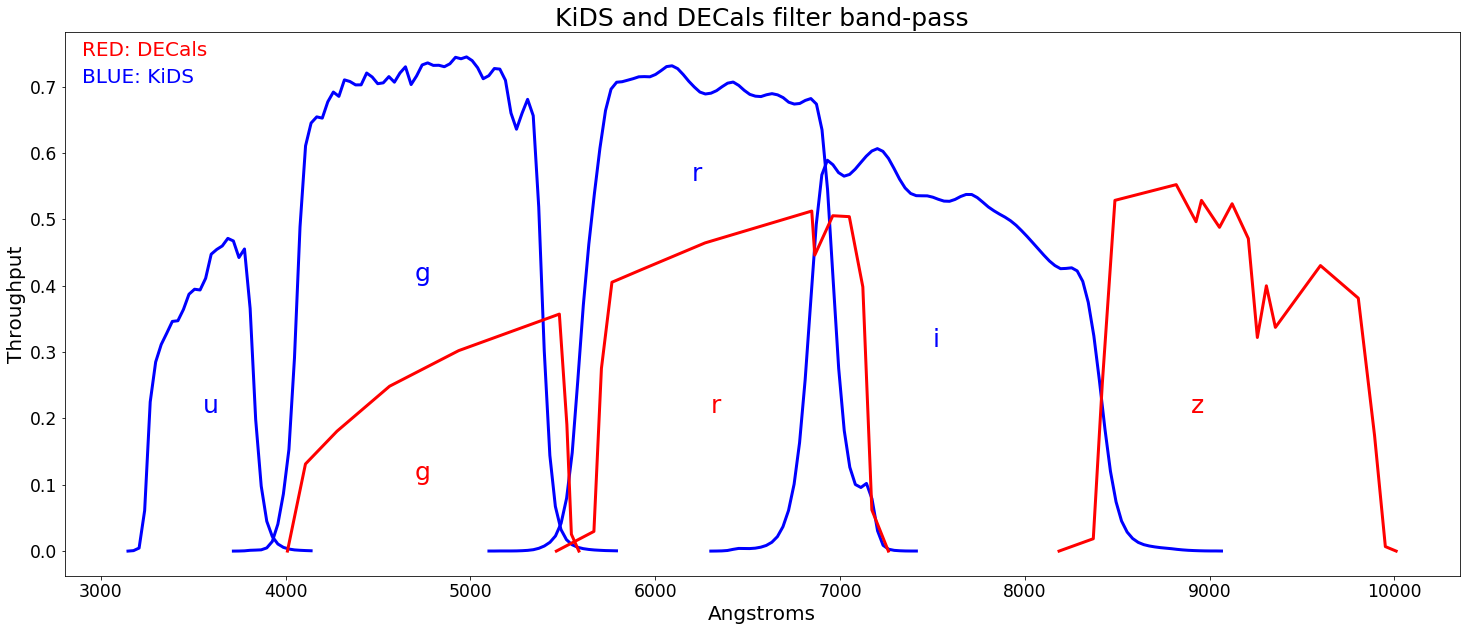

In [71]:
fig = plt.figure(figsize=(25,10))
for i in range(len(kids_x_data)):
    plt.plot(kids_x_data[i],kids_y_data[i], color="blue", lw = 3)


for j in range(len(decals_x_data)):
    plt.plot(decals_x_data[j],decals_y_data[j], color="red", lw = 3)

plt.title('KiDS and DECals filter band-pass', fontsize = 25)
plt.xlabel('Angstroms', fontsize = 20)
plt.ylabel('Throughput', fontsize = 20)
plt.tick_params(labelsize = 'xx-large')
plt.text(2900, 0.74, 'RED: DECals', color = 'red', verticalalignment='bottom', horizontalalignment='left', fontsize=20)
plt.text(2900, 0.7, 'BLUE: KiDS', color = 'blue', verticalalignment='bottom', horizontalalignment='left', fontsize=20)
plt.text(3550, 0.2, 'u', color = 'blue', verticalalignment='bottom', horizontalalignment='left', fontsize=25)
plt.text(4700, 0.4, 'g', color = 'blue', verticalalignment='bottom', horizontalalignment='left', fontsize=25)
plt.text(6200, 0.55, 'r', color = 'blue', verticalalignment='bottom', horizontalalignment='left', fontsize=25)
plt.text(7500, 0.3, 'i', color = 'blue', verticalalignment='bottom', horizontalalignment='left', fontsize=25)

plt.text(4700, 0.1, 'g', color = 'red', verticalalignment='bottom', horizontalalignment='left', fontsize=25)
plt.text(6300, 0.2, 'r', color = 'red', verticalalignment='bottom', horizontalalignment='left', fontsize=25)
plt.text(8900, 0.2, 'z', color = 'red', verticalalignment='bottom', horizontalalignment='left', fontsize=25)

plt.show()

In [59]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [1]:

for img,targ in zip(X,y):
    rgb_default = np.zeros((3,101,101))
    #r : 0
    #i : 1
    #g : 2
    #u : 3
    
#     prepare bands for mak_lupton_rgb

    g = img[2]
    idx_g = np.where(g<0)
    g[idx_g]= 0
    r = img[0]
    idx_r = np.where(r<0)
    r[idx_r]= 0
    i = img[1]
    idx_i = np.where(i<0)
    i[idx_i]= 0

    g_norm = g*(1/np.max(g))
    r_norm = r*(1/np.max(r))
    i_norm = i*(1/np.max(i))
    
#     construct rgb image
    
    rgb_default = make_lupton_rgb(np.flip(i_norm,axis = 0), np.flip(r_norm,axis = 0), np.flip(g_norm,axis = 0), minimum = 0, Q=0, stretch=1)
    plt.figure(figsize = (20,5))
    plt.subplot(151)
    if (targ == 0):
        plt.title("composite (non-lens)")
    else:
        plt.title("composite (lens)")
    plt.imshow(rgb_default, origin='lower')
    plt.subplot(152)
    plt.title("r-band\n" + str(img[0].max()))
    plt.imshow(img[0])
    plt.subplot(153)
    plt.title("i-band\n" + str(img[1].max()))
    plt.imshow(img[1])
    plt.subplot(154)
    plt.title("g-band\n" + str(img[2].max()))
    plt.imshow(img[2])
    plt.subplot(155)
    plt.title("u-band\n" + str(img[3].max()))
    plt.imshow(img[3])
    plt.show()
    
rgb_default.shape

NameError: name 'X' is not defined